<a href="https://colab.research.google.com/github/lucasfranca016/BootcampDataScience/blob/main/modulo5/mod5_a6_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

dados = pd.read_excel("https://github.com/alura-cursos/covid-19-clinical/blob/main/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx?raw=true")
dados

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1921,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
1922,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4-6,0
1923,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,6-12,0


In [ ]:
def preencher(dados):
    feat_cont_col = dados.iloc[:, 13:-2].columns
    feat_cont = dados.groupby("PATIENT_VISIT_IDENTIFIER", as_index = False)[feat_cont_col].fillna(method='bfill').fillna(method='ffill')
    feat_cat = dados.iloc[:, :13]
    saida = dados.iloc[:, -2:]
    dados_finais = pd.concat([feat_cat, feat_cont, saida], ignore_index=True, axis=1)
    dados_finais.columns = dados.columns
    return dados_finais

In [ ]:
dados_limpos = preencher(dados)
remover = dados_limpos.query("WINDOW=='0-2' and ICU==1")['PATIENT_VISIT_IDENTIFIER'].values
dados_limpos = dados_limpos.query("PATIENT_VISIT_IDENTIFIER not in @remover")
dados_limpos = dados_limpos.dropna()
dados_limpos.describe()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
count,1760.000000,1760.000000,1760.000000,1760.00000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,...,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000
mean,192.818182,0.457386,0.380682,0.11250,0.026136,0.101705,0.021591,0.132955,0.049432,0.212500,...,-0.778209,-0.823458,-0.915593,-0.828593,-0.774857,-0.854690,-0.788155,-0.824412,-0.915552,0.201705
std,110.637724,0.498322,0.485692,0.31607,0.159586,0.302345,0.145385,0.339622,0.216829,0.409193,...,0.411909,0.276279,0.247695,0.287696,0.368311,0.240338,0.384405,0.274953,0.248093,0.401387
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,97.750000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,191.500000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
75%,289.250000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.764706,-0.738095,-0.919192,-0.726087,-0.651942,-0.771625,-0.756272,-0.736640,-0.920103,0.000000
max,384.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.333333,1.000000,1.000000,1.000000,1.000000,1.000000,0.329660,1.000000,1.000000


In [ ]:
def prepare(rows):
    if(np.any(rows['ICU'])):
        rows.loc[rows['WINDOW'] == '0-2', 'ICU'] = 1
    
    return rows.loc[rows['WINDOW'] == '0-2']

In [ ]:
dados_limpos = dados_limpos.groupby("PATIENT_VISIT_IDENTIFIER").apply(prepare)

#Vamos transformar a coluna age percentil em dados categoricos:

dados_limpos['AGE_PERCENTIL'] = dados_limpos['AGE_PERCENTIL'].astype('category').cat.codes
dados_limpos.head()

,,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
PATIENT_VISIT_IDENTIFIER,,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1
2,10,2,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-0.959596,-0.515528,-0.351328,-0.747001,-0.756272,-1.000000,-0.961262,0-2,1
3,15,3,0,3,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
4,20,4,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.952381,-0.979798,-1.000000,-0.883669,-0.956805,-0.870968,-0.953536,-0.980333,0-2,0
5,25,5,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.976190,-0.979798,-0.860870,-0.714460,-0.986481,-1.000000,-0.975891,-0.980129,0-2,0


In [ ]:
import numpy as np
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


np.random.seed(73246)

#Tiramos o describe daqui
xco = dados.columns
y = dados_limpos['ICU']
x = dados_limpos[xco].drop(['ICU','WINDOW'], axis=1)
xtrain, xteste, ytrain, yteste = train_test_split(x, y, stratify=y)
modelo = DummyClassifier()
modelo.fit(xtrain, ytrain)

yprediction = modelo.predict(xteste)
accuracy_score(yteste, yprediction)

0.5340909090909091

In [ ]:
modelo = LogisticRegression(max_iter = 10000)
modelo.fit(xtrain, ytrain)
yprediction = modelo.predict(xteste)
accuracy_score(yteste, yprediction)

0.6818181818181818

In [ ]:
#Colunas q n entraram no modelo:

for coluna in dados.columns:
    if coluna not in xco:
        print(coluna)
        
#Window é realmente irrelevante pois pegamos só 0-2 mas age percentil é braba, vamos tirar o describe ali.

### Desafio 1 : Transformar a coluna age percentil em dados categóricos usando outro método



In [ ]:
le = LabelEncoder()
dados['AGE_PERCENTIL'] = le.fit_transform(dados['AGE_PERCENTIL'])
dados.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0
4,0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1


### Aula 2

Alan comenta que temos que ter cuidado com a forma que transformamos a coluna Age_percentil em dados categórios, pois dependendo do modelo ele pode entender que essa coluna tem um peso maior só por conta da forma que eles está categorizada, de 0  a 9 por exemplo.

### Desafio 2 : Verificar o impacto da mudança de categorização nos resultados

In [ ]:
dados_limpos2 = preencher(dados)
remover2 = dados_limpos2.query("WINDOW=='0-2' and ICU==1")['PATIENT_VISIT_IDENTIFIER'].values
dados_limpos2 = dados_limpos2.query("PATIENT_VISIT_IDENTIFIER not in @remover2")
dados_limpos2 = dados_limpos2.dropna()

dados_limpos2 = dados_limpos2.groupby("PATIENT_VISIT_IDENTIFIER").apply(prepare)

dados_limpos2['AGE_PERCENTIL'] = dados_limpos2['AGE_PERCENTIL'].astype('category').cat.codes

In [ ]:
xco = dados.columns
y2 = dados_limpos2['ICU']
x2 = dados_limpos2[xco].drop(['ICU','WINDOW'], axis=1)
xtrain2, xteste2, ytrain2, yteste2 = train_test_split(x, y, stratify=y)
modelo = DummyClassifier()
modelo.fit(xtrain2, ytrain2)

yprediction = modelo.predict(xteste2)
accuracy_score(yteste2, yprediction)

0.5340909090909091

In [ ]:
modelo = LogisticRegression(max_iter = 10000)
modelo.fit(xtrain2, ytrain2)
yprediction = modelo.predict(xteste2)
accuracy_score(yteste2, yprediction)

#Olha a fera ai meu

0.7386363636363636

In [ ]:
#Vamos estudar métricas de avaliação agora

from sklearn.tree import DecisionTreeClassifier

modelo_arvore = DecisionTreeClassifier()
modelo_arvore.fit(xtrain, ytrain)
predicao_arvore = modelo_arvore.predict(xteste)
accuracy_score(yteste, predicao_arvore)

0.6590909090909091

É ressaltado nesse ponto a importância de um método de classificação adequado, por exemplo, aqui nosso melhor modelo seria a regressão logística, pois ele possui uma melhor acurácia, logo, acerta mais num geral o resultado, mas o Thiago levanta a questão que poderiamos ter a informação de qual índice os modelos estão acertando mais, se é 1 ou 0, o que nossa métrica não fornece no momento.

Vamos plotar os valores preditos pelos valores reais usando uma matriz de confusão.

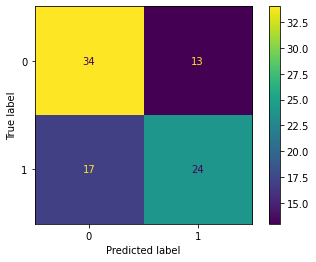

In [ ]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

plot_confusion_matrix(modelo_arvore, xteste, yteste)

Vemos então que o nosso modelo prevê para uma parte considerável dos pacientes que precisam de UTI que eles não precisam, assim, podendo gerar complicações para esse paciente como até mesmo o óbito, logo, se torna imprescindível a diminuição desse índice de falsos negativos.

In [ ]:
VP = 24
VN = 34
FP = 13
FN = 17

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(yteste, predicao_arvore))

              precision    recall  f1-score   support

           0       0.67      0.72      0.69        47
           1       0.65      0.59      0.62        41

    accuracy                           0.66        88
   macro avg       0.66      0.65      0.65        88
weighted avg       0.66      0.66      0.66        88



Precisão é autodescritivo, é quanto eu acerto. O recall é pra qnd o falso negativo é muito pior que o falso positivo, que é o nosso caso porque o falso negativo pode retirar a vida de alguém. Segundo o Thiago " O recall tem a capacidade de mostrar de todas as classes positivas, quantas estão corretas.". f1 é uma média harmônica entre os 2. 

O recall segundo a wikipedia é o número de Verdadeiros positivos dividido pelo número de todos os resultados que deveriam ser identificados como positivo.

In [ ]:
p = 1
r = 0.1
media_harmonica = 2*(p*r)/(p+r)
print(media_harmonica)

0.18181818181818182


### Desafio 3 : Pesquisar sobre o f - score

De forma mais geral o f-score é uma medida que é uma média harmônica entre a precisão e o recall, como já mencionado anteriormente, contudo, aplicando pesos adicionais para um dos lados mais que o outro, valorizando mais a precisão ou o recall.

### Desafio 4 : Plotar a árvore de decisão criada pelo modelo

In [ ]:
#recall

VN/(FP + VN)

0.723404255319149

In [ ]:
#precisao:

VP/(VP + FP)

0.6486486486486487

In [ ]:
#recall

VP/(VP + FN)

0.5853658536585366

In [ ]:
from sklearn import tree

#Desafio 4:

text_representation = tree.export_text(modelo_arvore)
print(text_representation)

|--- feature_2 <= 6.50
|   |--- feature_129 <= -0.57
|   |   |--- feature_56 <= -0.86
|   |   |   |--- feature_196 <= -0.29
|   |   |   |   |--- feature_202 <= -0.86
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_202 >  -0.86
|   |   |   |   |   |--- feature_70 <= -0.82
|   |   |   |   |   |   |--- feature_181 <= -0.77
|   |   |   |   |   |   |   |--- feature_223 <= -0.72
|   |   |   |   |   |   |   |   |--- feature_145 <= 0.12
|   |   |   |   |   |   |   |   |   |--- feature_130 <= -1.00
|   |   |   |   |   |   |   |   |   |   |--- feature_56 <= -0.94
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- feature_56 >  -0.94
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_130 >  -1.00
|   |   |   |   |   |   |   |   |   |   |--- feature_209 <= 0.77
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   

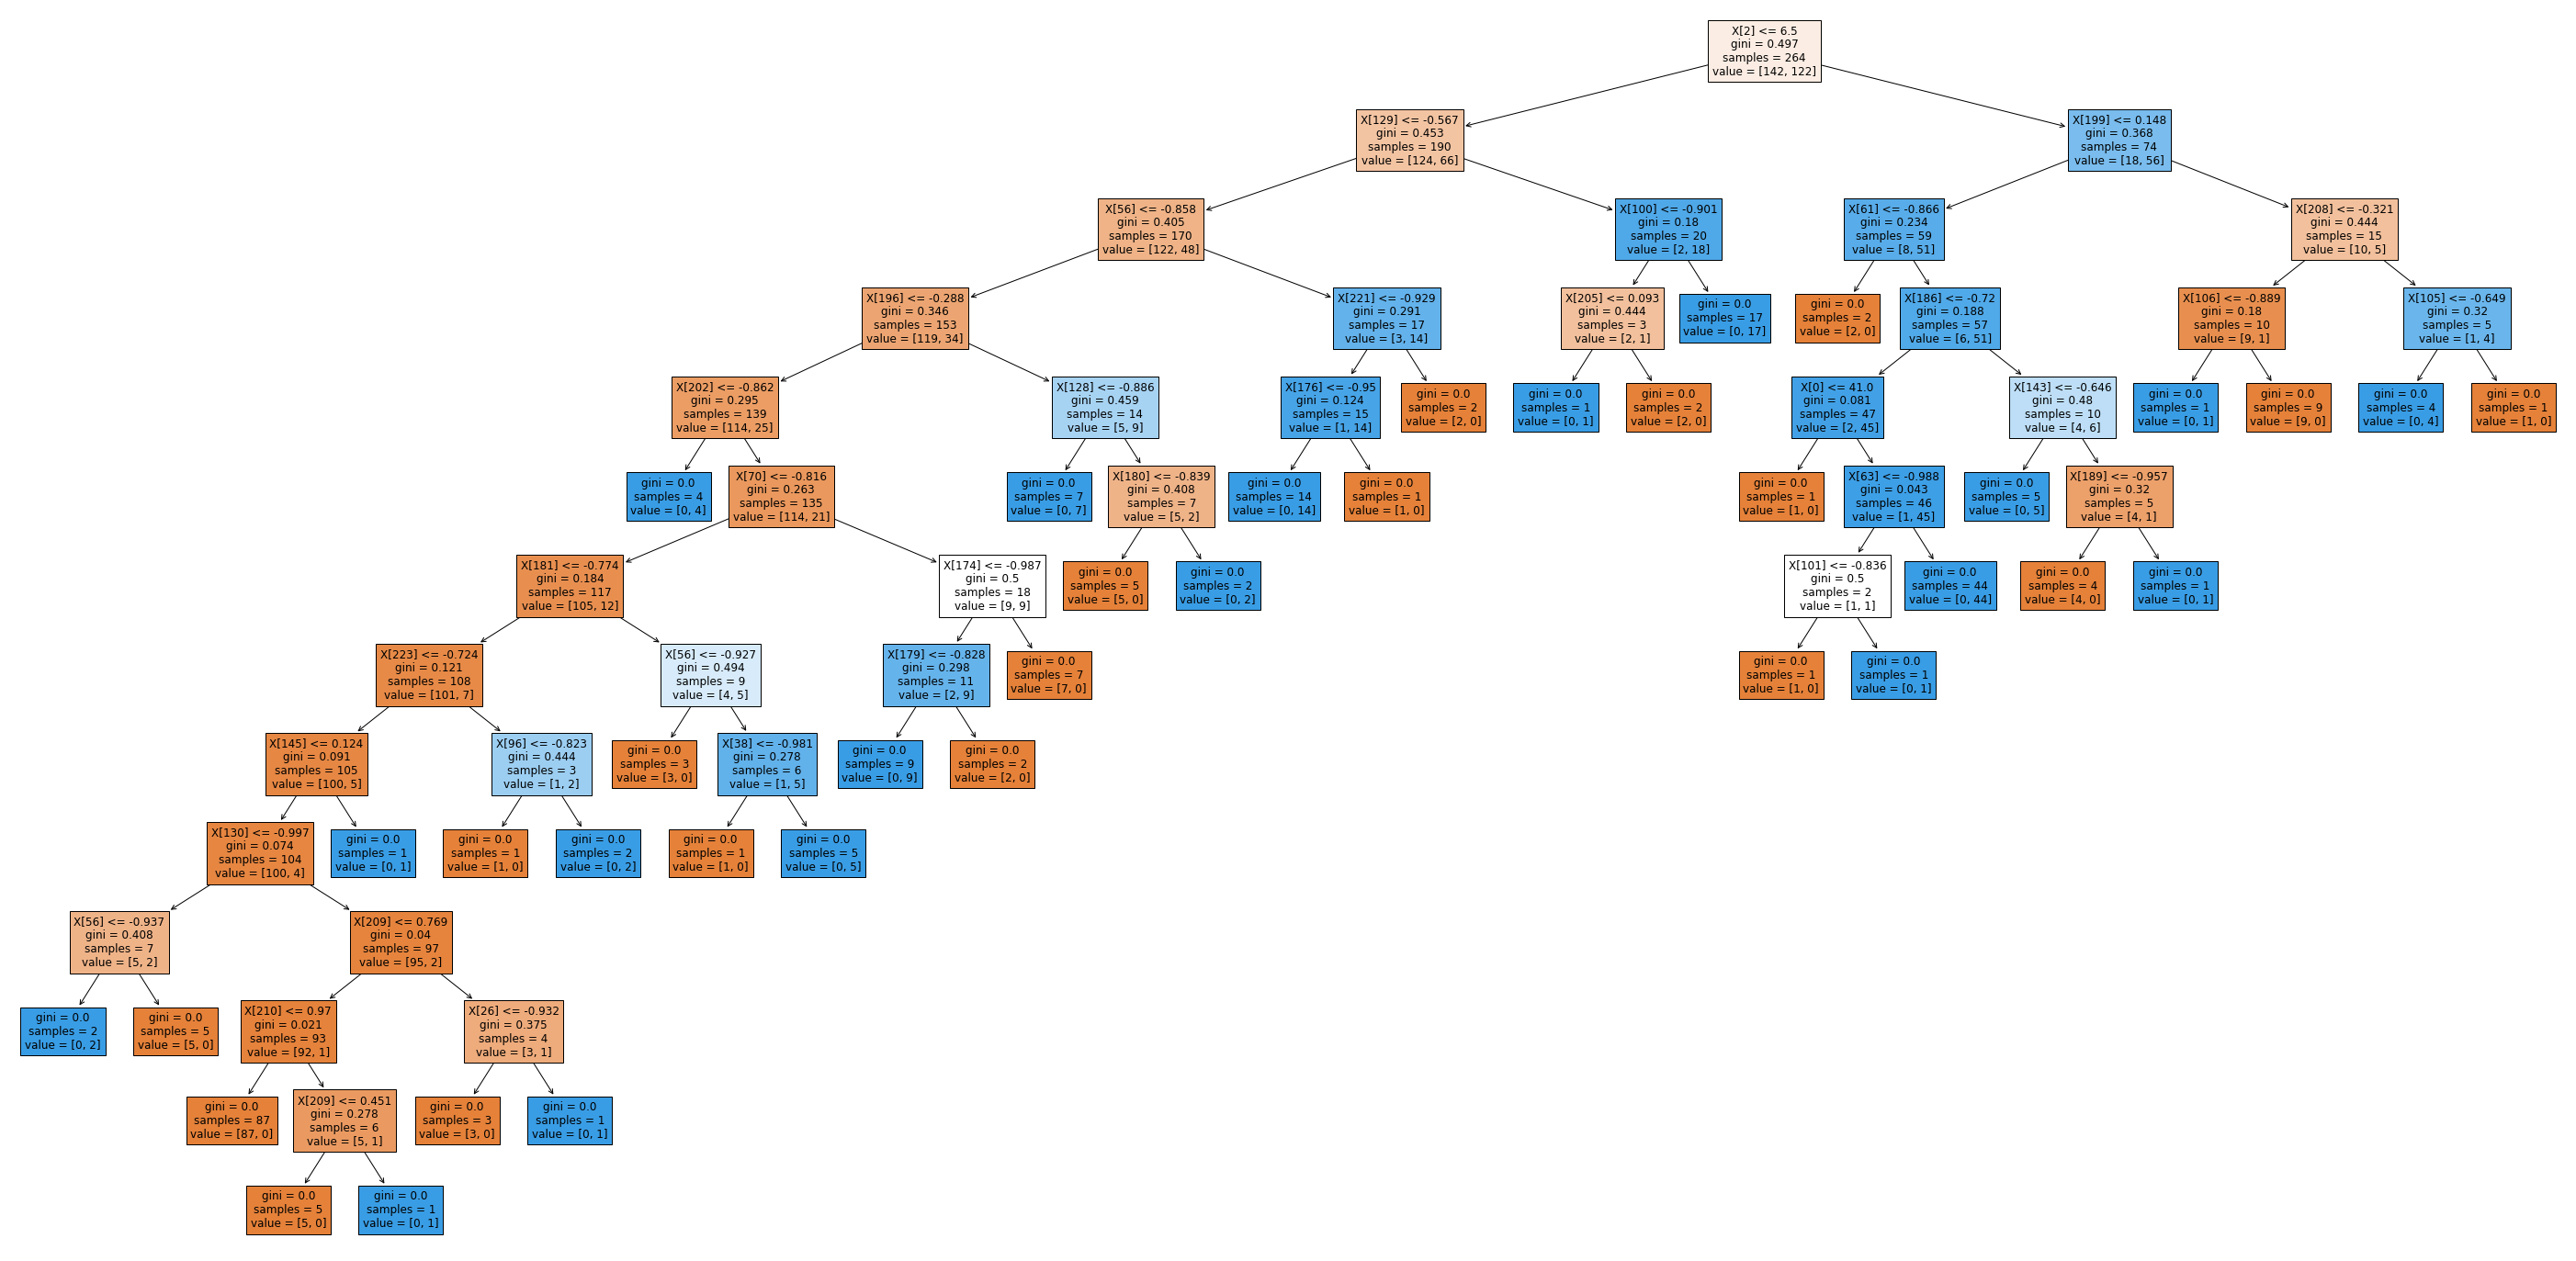

In [ ]:
fig = plt.figure(figsize=(50,25))
_ = tree.plot_tree(modelo_arvore,
                   filled=True)


Thiago ressalta que no nosso caso precisamos de uma métrica que separe muito bem as pessoas que precisam de UTI das que não precisam pois se focassemos só no recall do Verdadeiro Positivo, poderíamos utilizar um modelo que fala que todo mundo precisa ir para a UTI, o que nos geraria um recall de 100 % em verdadeiro positivo mas iria lotar a UTI, o que claramente geraria um colapso no sistema de saúde, então temos que ter um balanceamente ai nessa parada. Ele sugere a utilização de outra métrica chamada AUC, que vem de área sob a curva. Quanto mais próximo de 1 melhor.

In [ ]:
from sklearn.metrics import roc_auc_score

prob_arvore = modelo_arvore.predict_proba(xteste)
roc_auc_score(yteste, prob_arvore[:, 1])

#Métrica que mede a capacidade do meu modelo separar as classes entre 0 e 1

0.6543850544888428

In [ ]:
#Função para rodar os modelos

def roda_modelo(modelo, dados):
    xco = dados.columns
    y = dados['ICU']
    x = dados[xco].drop(['ICU','WINDOW'], axis=1)
    
    xtrain, xteste, ytrain, yteste = train_test_split(x, y, stratify=y, test_size=0.15)
    
    modelo.fit(xtrain, ytrain)
    predicao = modelo.predict(xteste)
    prob_predic = modelo.predict_proba(xteste)
    
    auc = roc_auc_score(yteste, prob_predic[:, 1])
    print(f'AUC {auc}')
    print('\nClassification Report')
    print(classification_report(yteste, predicao))


In [ ]:
roda_modelo(modelo_arvore, dados_limpos)

AUC 0.7414285714285713

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.64      0.72        28
           1       0.68      0.84      0.75        25

    accuracy                           0.74        53
   macro avg       0.75      0.74      0.74        53
weighted avg       0.75      0.74      0.73        53



In [ ]:
roda_modelo(modelo, dados_limpos)

AUC 0.83

Classification Report
              precision    recall  f1-score   support

           0       0.72      0.93      0.81        28
           1       0.88      0.60      0.71        25

    accuracy                           0.77        53
   macro avg       0.80      0.76      0.76        53
weighted avg       0.80      0.77      0.77        53



### Desafio 05: Criar uma função que gere a curva ROC

### Desafio 06: Pensar como reduzir o efeito da aleatoriedade nas previsões:

Podemos testar o modelo nos nossos dados testes, contudo, divididos em lotes, de maneira semelhante quando usamos o cross validation no módulo 3 em conjunto com o prophet. Fora isso, podemos fornecer uma seed em comum a todos os modelos para que os testes sejam feitos, contudo, não sei se essa é a solução mais eficaz.

In [ ]:
#Desafio 5:

import sklearn.metrics as metrics
    
def curvaROC(modelo,dados):
    xco = dados.columns
    y = dados['ICU']
    x = dados[xco].drop(['ICU','WINDOW'], axis=1)
    
    xtrain2, xteste2, ytrain2, yteste2 = train_test_split(x, y, stratify=y, test_size=0.20)
    
    modelo.fit(xtrain2, ytrain2)

    probs = modelo.predict_proba(xteste2)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(yteste2, preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

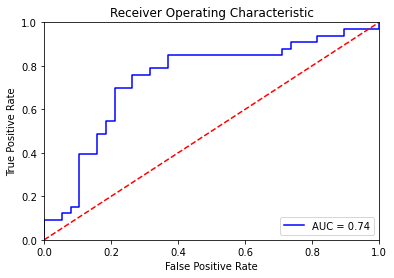

In [ ]:
curvaROC(modelo, dados_limpos)

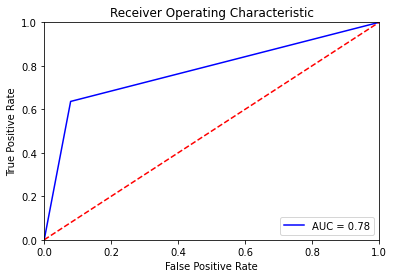

In [ ]:
curvaROC(modelo_arvore, dados_limpos)

### Aula 3

In [ ]:
#Vamos criar uma função para rodar o mesmo modelo n vezes e fazer uma média do parâmetro auc de todas esses modelos
#que rodaram a fim de diminuir o efeito da aleatoriedade!!!

def roda_n_modelos(modelo, dados, n):
    xco = dados.columns
    y = dados['ICU']
    x = dados[xco].drop(['ICU','WINDOW'], axis=1)
    
    auc_lista = []
    for _ in range(n):
        xtrain, xteste, ytrain, yteste = train_test_split(x, y, stratify=y, test_size=0.15)
    
        modelo.fit(xtrain, ytrain)
        prob_predic = modelo.predict_proba(xteste)
    
        auc = roc_auc_score(yteste, prob_predic[:, 1])
        auc_lista.append(auc)
    
    auc_medio = np.mean(auc_lista)
    auc_std = np.std(auc_lista)
    print(f'AUC {auc_medio}')
    print(f'Intervalo: {auc_medio - 2 * auc_std} ~ {auc_medio + 2 * auc_std}')
    
#Ao invés de olharmos para um ponto agora estamos olhando para um intervalo cujo há 95% de confiança do resultado
#estar contido ali também, utilizando a média e 2 vezes o desvio padrão para mais e para menos, show =]


In [ ]:
roda_n_modelos(modelo_arvore, dados_limpos, 50)

AUC 0.6303857142857142
Intervalo: 0.5002021045458627 ~ 0.7605693240255658


In [ ]:
roda_n_modelos(modelo, dados_limpos, 50)

AUC 0.7613714285714286
Intervalo: 0.6307253605018506 ~ 0.8920174966410066


In [ ]:
roda_n_modelos(modelo, dados_limpos, 50)

AUC 0.7724857142857142
Intervalo: 0.6514159115153407 ~ 0.8935555170560877


### Desafio 07: Estudar a documentação do scikit learning e testar outros modelos

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV

lr = SGDClassifier(loss='hinge',class_weight='balanced')

def roda_n_modelos_sgd(modelo, dados, n):
    xco = dados.columns
    y = dados['ICU']
    x = dados[xco].drop(['ICU','WINDOW'], axis=1)
    
    auc_lista = []
    for _ in range(n):
        xtrain, xteste, ytrain, yteste = train_test_split(x, y, stratify=y, test_size=0.15)
    
        modelo.fit(xtrain, ytrain)
        calibrator = CalibratedClassifierCV(modelo, cv='prefit')
        model=calibrator.fit(xtrain, ytrain)
        prob_predic = model.predict_proba(xteste)
    
        auc = roc_auc_score(yteste, prob_predic[:, 1])
        auc_lista.append(auc)
    
    auc_medio = np.mean(auc_lista)
    auc_std = np.std(auc_lista)
    print(f'AUC {auc_medio}')
    print(f'Intervalo: {auc_medio - 2 * auc_std} ~ {auc_medio + 2 * auc_std}')

In [ ]:
roda_n_modelos_sgd(lr, dados_limpos, 50)

AUC 0.5832571428571429
Intervalo: 0.3520099193768448 ~ 0.814504366337441


Utilizando o guia de qual algoritmo usar para treino indicado no imersão dados Alura eu primeiramente fui indicado ao SGD Classifier, que são algoritmos de classificação linear, como o próprio linear regressor que utilizamos antes, aliados ao método de treino de SGD, que consiste em um método aproximação estocástica de "Gradient descent" ou algo como regressão gradiente, que seria um método que acha um mínimo local na função e da passos na direção oposta do gradiente, essa linguagem se refere à cálculo diferencial e integral. Esse método é recomendado para problemas com muitas dimensões ou muitos dados e em nosso caso não teve um bom desempenho. 

Eu tive que usar esse CalibratedClassifierCV para retirar os parâmetros que estamos usando como classificação, pelo o que li ele é um algoritmo para fazer Cross validation mas não compreendi porque tenho que o usar para obter o predict_proba.

### Aula 4:

Trabalharemos agora com o cross validation, que é uma técnica para driblar a simples divisão em teste e treino que fizemos anteriormente, agora nós dividiremos nossos dados em diversas partes e usaremos cada uma delas para teste ao passo que todas menos a escolhida para teste serão usadas para treino, logo, estaremos realizando esse processo diversas vezes, contornando também o problema da aleatoriedade assim como também estaremos utilizando o conjunto total dos dados para treino.

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

#Estamos utilizando o StratifiedKFold para embaralhar nossos tados, de maneira a não inserir nenhum vies no
#treinamento. Esse método ira separa em proporções iguais os pacientes q foram pra UTI e que não foram entre 
#as divisões.

cv = StratifiedKFold(n_splits = 5, shuffle = True)

cross_validate(modelo, x, y, cv=cv)

{'fit_time': array([0.40728116, 0.12585378, 0.20677447, 0.42343187, 0.10399818]),
 'score_time': array([0.00310802, 0.00342703, 0.00308919, 0.00320601, 0.00303912]),
 'test_score': array([0.64788732, 0.66197183, 0.72857143, 0.8       , 0.71428571])}

### Desafio 8 : Testar outros splitter classes e observar as diferenças.

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold

# Esse agora faz oq estava sendo feito antes, não está tendo shuffle mais, contudo, está repetindo várias vezes
#essa divisão repetindo os dados, para termos menos efeitos aleatórios.
cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 10)

cross_validate(modelo, x, y, cv=cv)

{'fit_time': array([0.44638085, 0.16249156, 0.40987682, 0.34397125, 0.41512871,
        0.33172798, 0.37104392, 0.42285705, 0.34524751, 0.42670202,
        0.14925265, 0.46568799, 0.27220964, 0.45423055, 0.36937213,
        0.37614107, 0.13177633, 0.32451677, 0.44010139, 0.1196382 ,
        0.37670112, 0.36807656, 0.38187337, 0.40587878, 0.13223171,
        0.11753249, 0.37900829, 0.13043261, 0.39949489, 0.40749288,
        0.37807775, 0.33919835, 0.38538933, 0.38959002, 0.14519858,
        0.29929161, 0.41424775, 0.50474334, 0.19372272, 0.35567927,
        0.37026572, 0.33915329, 0.45629835, 0.20236778, 0.13331532,
        0.28881431, 0.39632511, 0.39177656, 0.45271063, 0.12573385]),
 'score_time': array([0.00307441, 0.00302887, 0.00421429, 0.00308776, 0.00316572,
        0.00322509, 0.00301671, 0.00307775, 0.00321078, 0.00311852,
        0.00344944, 0.00303745, 0.00305581, 0.0031085 , 0.00306344,
        0.00305223, 0.00306368, 0.00327301, 0.00319409, 0.0030067 ,
        0.00338292, 

In [ ]:
def roda_modelo_cv(modelo, dados, n_splits, n_repeats):
    
    #Adicionando uma random seed agora e embaralhando os dados
    np.random.seed(1231234)
    dados = dados.sample(frac=1).reset_index(drop=True)
    xco = dados.columns
    y = dados['ICU']
    x = dados[xco].drop(['ICU','WINDOW'], axis=1)
    
    cv = RepeatedStratifiedKFold(n_splits = n_splits, n_repeats = n_repeats)

    resultados = cross_validate(modelo, x, y, cv=cv, scoring = 'roc_auc', return_train_score = True)
    
    
    auc_medio = np.mean(resultados['test_score'])
    auc_medio_treino = np.mean(resultados['train_score'])

    auc_std = np.std(resultados['test_score'])
    
    print(f'AUC Médio: {auc_medio} e AUC Médio Treino: {auc_medio_treino}')

    print(f'Intervalo do AUC de treino: {auc_medio - 2 * auc_std} ~ {auc_medio + 2 * auc_std}')
    
    return auc_medio, auc_medio_treino

In [ ]:
roda_modelo_cv(modelo, dados_limpos, 5, 10)

AUC Médio: 0.7573912938057674
AUC Médio Treino: 0.8652358997520829
Intervalo: 0.6364178193603159 ~ 0.8783647682512189


(0.7573912938057674, 0.8652358997520829)

In [ ]:
roda_n_modelos(modelo, dados_limpos, 50)

AUC 0.7602571428571429
Intervalo: 0.638965199554201 ~ 0.8815490861600848


In [ ]:
roda_modelo_cv(modelo_arvore, dados_limpos, 5, 10)

AUC Médio: 0.6279279683391525
AUC Médio Treino: 1.0
Intervalo: 0.4988394445682657 ~ 0.7570164921100394


(0.6279279683391525, 1.0)

In [ ]:
roda_n_modelos(modelo_arvore, dados_limpos, 50)

AUC 0.6316571428571429
Intervalo: 0.5041688672857663 ~ 0.7591454184285196


In [ ]:
#Desafio 8:

from sklearn.model_selection import ShuffleSplit


cv = ShuffleSplit(n_splits=5, test_size=.25)

resultados = cross_validate(modelo, x, y, cv=cv, scoring = 'roc_auc')
    
    
auc_medio = np.mean(resultados['test_score'])
auc_std = np.std(resultados['test_score'])
    
print(f'AUC Médio {auc_medio}')
print(f'Intervalo: {auc_medio - 2 * auc_std} ~ {auc_medio + 2 * auc_std}')

AUC Médio 0.7666297690621816
Intervalo: 0.7041081259641202 ~ 0.829151412160243


In [ ]:
cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 10)

resultados = cross_validate(modelo, x, y, cv=cv, scoring = 'roc_auc')
    
    
auc_medio = np.mean(resultados['test_score'])
auc_std = np.std(resultados['test_score'])
    
print(f'AUC Médio {auc_medio}')
print(f'Intervalo: {auc_medio - 2 * auc_std} ~ {auc_medio + 2 * auc_std}')

AUC Médio 0.7645845995517049
Intervalo: 0.6615112841055371 ~ 0.8676579149978727


Podemos ver que somente dar shuffle com o ShuffleSplit nos dados gera um intervalo de confiança maior que o gerado ao usarmos o RepeatedStratifiedKFold para repetir o teste diversas vezes, ou seja, gera um resultado pior. 

### Aula 5

In [ ]:
#Vamos mudar alguns parâmetros para tentar melhorar os modelos:

#Começar mudando o max_depth do decisiontree:

modelo_arvore = DecisionTreeClassifier(max_depth=3)
roda_modelo_cv(modelo_arvore, dados_limpos, 5, 10)

AUC Médio: 0.6643847795163584
AUC Médio Treino: 0.8243714304989842
Intervalo: 0.5408496038380549 ~ 0.787919955194662


(0.6643847795163584, 0.8243714304989842)

Vemos que aumentando o max depth chega um ponto q o auc médio para de aumentar e começa a diminuir, vamos plotar o auc dos dados de treino agora para ter uma ideia do que está acontecendo.

In [ ]:
teste_l = []
treino_l = []

for i in range(1,10):
    modelo_arvore = DecisionTreeClassifier(max_depth=i)
    teste, treino = roda_modelo_cv(modelo_arvore, dados_limpos, 5, 10)
    teste_l.append(teste)
    treino_l.append(treino)

AUC Médio: 0.5755830262080263
AUC Médio Treino: 0.6445982993536308
Intervalo: 0.4925455188966163 ~ 0.6586205335194362
AUC Médio: 0.6544700741411268
AUC Médio Treino: 0.75415524801741
Intervalo: 0.5341969698278737 ~ 0.7747431784543799
AUC Médio: 0.6643847795163584
AUC Médio Treino: 0.8243714304989842
Intervalo: 0.5408496038380549 ~ 0.787919955194662
AUC Médio: 0.6554932930837536
AUC Médio Treino: 0.8832038893699776
Intervalo: 0.5297661979528577 ~ 0.7812203882146495
AUC Médio: 0.6475058192163456
AUC Médio Treino: 0.9275331115338461
Intervalo: 0.5011322213480258 ~ 0.7938794170846655
AUC Médio: 0.6239047951959137
AUC Médio Treino: 0.9567921210944048
Intervalo: 0.46637314891829074 ~ 0.7814364414735366
AUC Médio: 0.6117738776455882
AUC Médio Treino: 0.9745102329260463
Intervalo: 0.46527354841323065 ~ 0.7582742068779458
AUC Médio: 0.5987671815056683
AUC Médio Treino: 0.9855938255169409
Intervalo: 0.45918657972256777 ~ 0.7383477832887688
AUC Médio: 0.5877544694814432
AUC Médio Treino: 0.991376

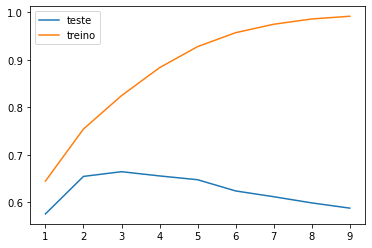

In [ ]:
x = range(1,10)
plt.plot(x, teste_l, label='teste')
plt.plot(x, treino_l, label='treino')
plt.legend()
plt.show()

Não está tão evidente mas temos um problema de overfitting, assim, o modelo ficou tão bom em separar os dados de treino que ele não consegue generalizar.

### Desafio 09: Deixar o gráfico AUC bonitão.

### Desafio 10: Usar outra base de dados para ver melhor esse overfitting (dica: base do titanic no kaggle)

### Desafio 11: Estudar um pouco mais sobre overfit e underfit.


Vamos testar outros modelos que tenham chance de ter um overfit menor como o randomforest, que é como o decisiontree só que escolhendo seus grupos aleatoriamente, assim, reduzindo a chance de ter um overfit.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

teste_l = []
treino_l = []

for i in range(1,10):
    modelo_floresta = RandomForestClassifier(max_depth=i)
    teste, treino = roda_modelo_cv(modelo_floresta, dados_limpos, 5, 10)
    teste_l.append(teste)
    treino_l.append(treino)

AUC Médio: 0.7754785968683994
AUC Médio Treino: 0.8549995635150238
Intervalo: 0.6850191589947702 ~ 0.8659380347420286
AUC Médio: 0.7868632672744513
AUC Médio Treino: 0.8976687127896622
Intervalo: 0.6972757895267264 ~ 0.8764507450221762
AUC Médio: 0.7931550390103022
AUC Médio Treino: 0.9403124842531797
Intervalo: 0.7059504396364498 ~ 0.8803596383841545
AUC Médio: 0.7983565832578993
AUC Médio Treino: 0.9709123570096604
Intervalo: 0.7106178359984121 ~ 0.8860953305173864
AUC Médio: 0.7990938591103065
AUC Médio Treino: 0.98788117359786
Intervalo: 0.7108500843768295 ~ 0.8873376338437835
AUC Médio: 0.8004527808310704
AUC Médio Treino: 0.9959760554693325
Intervalo: 0.7132706394104619 ~ 0.887634922251679
AUC Médio: 0.7994808369972844
AUC Médio Treino: 0.9990287365273224
Intervalo: 0.7070232488722833 ~ 0.8919384251222856
AUC Médio: 0.7977776116427432
AUC Médio Treino: 0.9998630161707951
Intervalo: 0.7098316260879319 ~ 0.8857235971975544
AUC Médio: 0.7963008103797579
AUC Médio Treino: 0.999984754

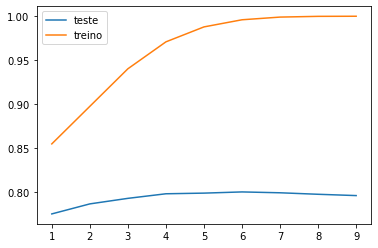

In [ ]:
x = range(1,10)
plt.plot(x, teste_l, label='teste')
plt.plot(x, treino_l, label='treino')
plt.legend()
plt.show()

In [ ]:
#Contudo o melhor parâmetro para mudarmos no randomForest é o n_estimators que é o nmr de árvores q ele cria

modelo_floresta = RandomForestClassifier(max_depth=i, n_estimators=10)
roda_modelo_cv(modelo_floresta, dados_limpos, 5, 10)

AUC Médio: 0.7475246239062027
AUC Médio Treino: 0.9974479705098765
Intervalo: 0.6394727909999747 ~ 0.8555764568124307


(0.7475246239062027, 0.9974479705098765)

In [ ]:
modelo_floresta = RandomForestClassifier(max_depth=i, n_estimators=100)
roda_modelo_cv(modelo_floresta, dados_limpos, 5, 10)

AUC Médio: 0.7963008103797579
AUC Médio Treino: 0.9999847540078024
Intervalo: 0.7054318643945308 ~ 0.887169756364985


(0.7963008103797579, 0.9999847540078024)

In [ ]:
modelo_floresta = RandomForestClassifier(max_depth=i, n_estimators=200)
roda_modelo_cv(modelo_floresta, dados_limpos, 5, 10)

AUC Médio: 0.7960362785033837
AUC Médio Treino: 0.999996963562753
Intervalo: 0.6930684869757805 ~ 0.8990040700309868


(0.7960362785033837, 0.999996963562753)

### Desafio 12 :  Escolhe um modelo de machine learning, estude os hiperparâmetros desse modelo e teste vários hiperparâmetros.

### Desafio 13 : Pesquisar como salvar um modelo finalizado.

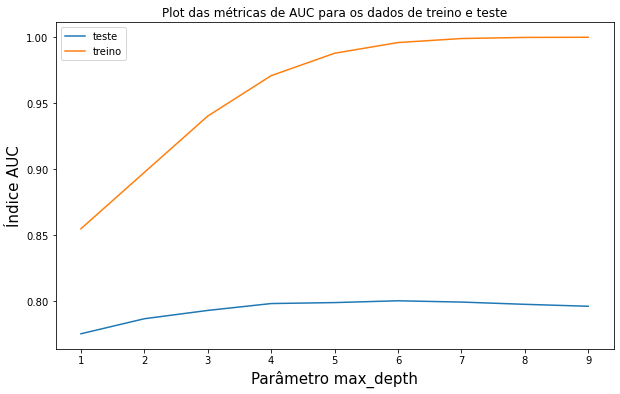

In [ ]:
#Desafio 9:

import seaborn as sns

plt.figure(figsize=(10,6))
ax = sns.lineplot(x=x, y=teste_l, label = 'teste')
sns.lineplot(x=x, y=treino_l, label = 'treino')
plt.title('Plot das métricas de AUC para os dados de treino e teste')
plt.xlabel('Parâmetro max_depth', fontsize=15)
plt.ylabel('Índice AUC', fontsize=15)
plt.show()

In [ ]:
#Desafio 10:

exp = pd.read_csv('dados_experimentos.csv')

In [ ]:
colunas = []
exp2 = exp
for i in exp2.columns:
    i = i.replace('-', '')
    colunas.append(i)
exp2.columns = colunas

In [ ]:
mapa = {'droga':'composto'}
exp2.rename(columns = mapa, inplace = True)

In [ ]:
dados_resultados = pd.read_csv('dados_resultados.csv')
dados_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
dados_resultados['n_moa'] = dados_resultados.drop('id', axis=1).sum(axis=1)

In [ ]:
dados_resultados['ativo_moa'] = (dados_resultados['n_moa'] != 0)

In [ ]:
dados_combinados = pd.merge(exp, dados_resultados[['id', 'n_moa', 'ativo_moa']], on='id')

In [ ]:
dados_combinados.head()

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,...,c92,c93,c94,c95,c96,c97,c98,c99,n_moa,ativo_moa
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True


In [ ]:
teste_l = []
treino_l = []


for i in range(1,11,3):
    modelo = DecisionTreeClassifier(max_depth=i)
    np.random.seed(1231234)
    roda_dados = dados_combinados.sample(frac=1).reset_index(drop=True)
    xco = roda_dados.columns
    y = roda_dados['ativo_moa']
    x = roda_dados[xco].select_dtypes('float64')
    
    cv = RepeatedStratifiedKFold(n_splits = 3, n_repeats = 5)

    resultados = cross_validate(modelo, x, y, cv=cv, scoring = 'roc_auc', return_train_score = True)
    
    
    auc_medio = np.mean(resultados['test_score'])
    auc_medio_treino = np.mean(resultados['train_score'])

    auc_std = np.std(resultados['test_score'])
    
    teste_l.append(auc_medio)
    treino_l.append(auc_medio_treino)
    

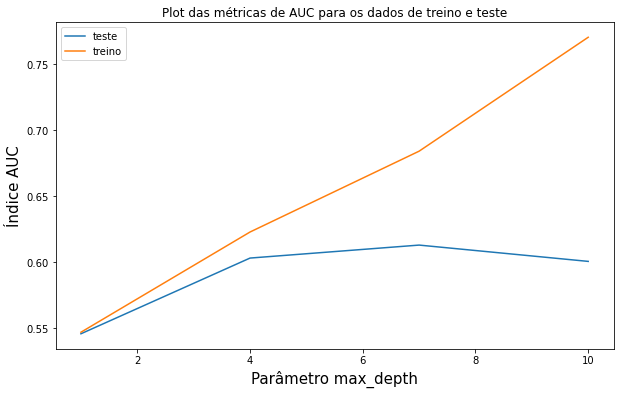

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(x=range(1,11,3), y=teste_l, label = 'teste')
sns.lineplot(x=range(1,11,3), y=treino_l, label = 'treino')
plt.title('Plot das métricas de AUC para os dados de treino e teste')
plt.xlabel('Parâmetro max_depth', fontsize=15)
plt.ylabel('Índice AUC', fontsize=15)
plt.show()

### Desafio 11:

Underfit: É um modelo criado que se torna muito simples por não conseguir parametrizar de forma correta os dados, seja por passar a um dado modelo um conjunto de dados que ele não está preparado para generalizar ou por passar poucos dados. Geralmente ocorre com modelos lineares ao receberem dados que não são lineares.

Overfit : Acontece quando o algoritmo fica muito complexo e aprende até as pequenas nuâncias dos seus dados de treino, que podem não representar nuâncias gerais dos dados da realidade que você quer predizer, logo, ele vira um modelo que não consegue generalizar bem o que aprendeu.



### Desafio 12:

Comecei estudando o efeito do parâmetro max_features, que muda o número de colunas que uma tree individual poderá usar para treino

In [ ]:
modelo_floresta = RandomForestClassifier(max_depth=4, n_estimators=100, max_features='sqrt')
roda_modelo_cv(modelo_floresta, dados_limpos, 5, 10)

AUC Médio: 0.7983565832578993
AUC Médio Treino: 0.9709123570096604
Intervalo: 0.7106178359984121 ~ 0.8860953305173864


(0.7983565832578993, 0.9709123570096604)

In [ ]:
modelo_floresta = RandomForestClassifier(max_depth=4, n_estimators=100, max_features=0.2)
roda_modelo_cv(modelo_floresta, dados_limpos, 5, 10)

AUC Médio: 0.7932441861718178
AUC Médio Treino: 0.9743011219308922
Intervalo: 0.6960758500525174 ~ 0.8904125222911182


(0.7932441861718178, 0.9743011219308922)

In [ ]:
modelo_floresta = RandomForestClassifier(max_depth=4, n_estimators=100)
roda_modelo_cv(modelo_floresta, dados_limpos, 5, 10)

AUC Médio: 0.7983565832578993
AUC Médio Treino: 0.9709123570096604
Intervalo: 0.7106178359984121 ~ 0.8860953305173864


(0.7983565832578993, 0.9709123570096604)

In [ ]:
modelo_floresta = RandomForestClassifier(max_depth=4, n_estimators=100, max_features=0.05)
roda_modelo_cv(modelo_floresta, dados_limpos, 5, 10)

AUC Médio: 0.7962438036122247
AUC Médio Treino: 0.9699747867693757
Intervalo: 0.707251161210455 ~ 0.8852364460139944


(0.7962438036122247, 0.9699747867693757)

Parece que mesmo diminuindo bastante o número de features que uma tree individual pode usar o seu índice auc não é muito alterado para uma depth = 4 e um n_estimators = 100. Os parâmetros de depth e n_estimators foram repetidos pois apresentaram melhores resultados anteriormente, um estudo mais preciso seria variar estes mesmos parâmetros para ver como o resultado ia ser alterado ao alterarmos o max_features também. 

In [ ]:
modelo_floresta = RandomForestClassifier(max_depth=4, n_estimators=100, min_samples_leaf=5)
roda_modelo_cv(modelo_floresta, dados_limpos, 5, 10)

AUC Médio: 0.7976672485883012
AUC Médio Treino: 0.9540966413196159
Intervalo: 0.7071794847414246 ~ 0.8881550124351778


(0.7976672485883012, 0.9540966413196159)

In [ ]:
modelo_floresta = RandomForestClassifier(max_depth=4, n_estimators=100, min_samples_leaf=10)
roda_modelo_cv(modelo_floresta, dados_limpos, 5, 10)

AUC Médio: 0.7960709109228847
AUC Médio Treino: 0.9314388145333098
Intervalo: 0.7083735827369344 ~ 0.8837682391088351


(0.7960709109228847, 0.9314388145333098)

In [ ]:
modelo_floresta = RandomForestClassifier(max_depth=4, n_estimators=100, min_samples_leaf=15)
roda_modelo_cv(modelo_floresta, dados_limpos, 5, 10)

AUC Médio: 0.79598130576749
AUC Médio Treino: 0.9138987233588359
Intervalo: 0.7039758486943641 ~ 0.887986762840616


(0.79598130576749, 0.9138987233588359)

In [ ]:
modelo_floresta = RandomForestClassifier(max_depth=4, n_estimators=100, min_samples_leaf=50)
roda_modelo_cv(modelo_floresta, dados_limpos, 5, 10)

AUC Médio: 0.7584842019052546
AUC Médio Treino: 0.8298767679163765
Intervalo: 0.6553966870367951 ~ 0.861571716773714


(0.7584842019052546, 0.8298767679163765)

O parâmetro testado agora foi o min_samples_leaf que muda o número de dados mínimos para uma folha em cada tree montada pelo modelo. Uma folha seria o fim de cada caminho de parâmetros percorridos por cada árvore, um min_samples_leaf mais alto é útil para evitarmos que o modelo se parametrize em cima do ruído dos dados usados, ou seja, consiga parametrizar-se de melhor forma a generalizar os seus resultados e dar menos importância a features que sejam realmente menos importantes. Em nosso teste quanto maior o min_samples_leaf menor foi o AUC dos dados de treino e dos dados de teste, contudo, sendo o AUC de treino mais afetado, sendo AUC de teste sendo mais afetado quando eu aumentei bastante o parâmetro.

In [ ]:
#Desafio 13:
from joblib import dump, load
import os
filename = os.path.join('/home/lulu/Modelos/', 'test.joblib')
dump(modelo_floresta, filename)

#Brasil

['/home/lulu/Modelos/test.joblib']

### Aula 6:

Vamos mudar a forma que tratamos os dados agora, logo, como temos muitas colunas vamos procurar diminuir esse número ao treinar nosso algortimo. Primeiro vamos procurar remover colunas que possuem alta correlação.

In [ ]:
#Primeiro criando uma matriz de correlação para isso, mas primeiro, queremos ver quais colunas faz sentido usar:

dados_limpos.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 352 entries, (0, 0) to (384, 1920)
Columns: 231 entries, PATIENT_VISIT_IDENTIFIER to ICU
dtypes: float64(225), int64(4), int8(1), object(1)
memory usage: 659.8+ KB


In [ ]:
dados_limpos.select_dtypes(exclude='float64')
#realmente essas são colunas obsoletas

,,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,WINDOW,ICU
PATIENT_VISIT_IDENTIFIER,,,,,,,
0,0,0,1,5,0,0-2,1
2,10,2,0,0,0,0-2,1
3,15,3,0,3,1,0-2,0
4,20,4,0,0,0,0-2,0
5,25,5,0,0,0,0-2,0
...,...,...,...,...,...,...,...
380,1900,380,0,3,1,0-2,1
381,1905,381,1,9,0,0-2,0
382,1910,382,0,4,0,0-2,1


In [ ]:
#Filtrando elas então e olhando só o valor absoluto de correlação, pois não importa se é correlação inversa aqui:

#Vamos excluir aquelas que possuirem mais que um certo número de correlação com outras colunas.

#Contudo, temos que nos atentar que temos que deixar uma das variáveis que são altamente correlacionadas e que
#a matriz é espelhada entre a metade acima da diagonal e a metade abaixo, além de que uma variável sempre
#vai ter correlação 1 com ela mesma.

alta_corr = 0.95
matriz_corr = dados_limpos.iloc[:,4:-2].corr().abs()
matriz_corr

,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,...,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL
DISEASE GROUPING 1,1.000000,0.196347,0.278271,0.017529,0.340370,0.202849,0.489245,0.176224,0.153793,0.009174,...,0.129220,0.028964,0.041099,0.056287,0.050070,0.054745,0.093512,0.052568,0.039692,0.056984
DISEASE GROUPING 2,0.196347,1.000000,0.084392,0.114818,0.112878,0.032173,0.118516,0.139947,0.068432,0.032245,...,0.014222,0.001618,0.024705,0.085122,0.070419,0.016917,0.005102,0.003487,0.024682,0.099019
DISEASE GROUPING 3,0.278271,0.084392,1.000000,0.308875,0.293259,0.275760,0.471039,0.075599,0.141903,0.035719,...,0.015035,0.013900,0.000746,0.005011,0.004373,0.020683,0.011633,0.008895,0.003183,0.006110
DISEASE GROUPING 4,0.017529,0.114818,0.308875,1.000000,0.128287,0.171438,0.136472,0.103100,0.063919,0.049593,...,0.023554,0.016131,0.032550,0.026121,0.043714,0.029596,0.034997,0.023616,0.034426,0.025072
DISEASE GROUPING 5,0.340370,0.112878,0.293259,0.128287,1.000000,0.129836,0.459169,0.108849,0.149025,0.082353,...,0.011404,0.045482,0.081749,0.098081,0.017232,0.059434,0.045113,0.058564,0.080693,0.097014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BLOODPRESSURE_SISTOLIC_DIFF_REL,0.054745,0.016917,0.020683,0.029596,0.059434,0.003571,0.009490,0.028020,0.040651,0.056603,...,0.371623,0.366943,0.425505,0.483904,0.779557,1.000000,0.418624,0.421228,0.422108,0.479010
HEART_RATE_DIFF_REL,0.093512,0.005102,0.011633,0.034997,0.045113,0.018891,0.073639,0.015522,0.064229,0.046781,...,0.949914,0.320962,0.362021,0.360456,0.373031,0.418624,1.000000,0.343703,0.364743,0.350001
RESPIRATORY_RATE_DIFF_REL,0.052568,0.003487,0.008895,0.023616,0.058564,0.049022,0.045665,0.019384,0.071270,0.029099,...,0.293907,0.961739,0.316620,0.349747,0.349866,0.421228,0.343703,1.000000,0.313204,0.342852
TEMPERATURE_DIFF_REL,0.039692,0.024682,0.003183,0.034426,0.080693,0.005691,0.031264,0.008243,0.018162,0.061337,...,0.298203,0.282514,0.999444,0.503937,0.356403,0.422108,0.364743,0.313204,1.000000,0.493818


In [ ]:
#Primeiro vamos localizar todos os valores = 1 para retirar a diagonal principal e também iremos eliminar o
#triângulo abaixo da diagonal principal.

np.triu(np.ones(matriz_corr.shape), k=1).astype(np.bool)

array([[False,  True,  True, ...,  True,  True,  True],
       [False, False,  True, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       ...,
       [False, False, False, ..., False,  True,  True],
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False, False, False]])

In [ ]:
#Aplicando essa matriz de false e true na matriz de correlação:

matriz_corr.where(np.triu(np.ones(matriz_corr.shape), k=1).astype(np.bool))

,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,...,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL
DISEASE GROUPING 1,NaN,0.196347,0.278271,0.017529,0.340370,0.202849,0.489245,0.176224,0.153793,0.009174,...,0.129220,0.028964,0.041099,0.056287,0.050070,0.054745,0.093512,0.052568,0.039692,0.056984
DISEASE GROUPING 2,NaN,NaN,0.084392,0.114818,0.112878,0.032173,0.118516,0.139947,0.068432,0.032245,...,0.014222,0.001618,0.024705,0.085122,0.070419,0.016917,0.005102,0.003487,0.024682,0.099019
DISEASE GROUPING 3,NaN,NaN,NaN,0.308875,0.293259,0.275760,0.471039,0.075599,0.141903,0.035719,...,0.015035,0.013900,0.000746,0.005011,0.004373,0.020683,0.011633,0.008895,0.003183,0.006110
DISEASE GROUPING 4,NaN,NaN,NaN,NaN,0.128287,0.171438,0.136472,0.103100,0.063919,0.049593,...,0.023554,0.016131,0.032550,0.026121,0.043714,0.029596,0.034997,0.023616,0.034426,0.025072
DISEASE GROUPING 5,NaN,NaN,NaN,NaN,NaN,0.129836,0.459169,0.108849,0.149025,0.082353,...,0.011404,0.045482,0.081749,0.098081,0.017232,0.059434,0.045113,0.058564,0.080693,0.097014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BLOODPRESSURE_SISTOLIC_DIFF_REL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.418624,0.421228,0.422108,0.479010
HEART_RATE_DIFF_REL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.343703,0.364743,0.350001
RESPIRATORY_RATE_DIFF_REL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.313204,0.342852
TEMPERATURE_DIFF_REL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.493818


In [ ]:
matriz_upper = matriz_corr.where(np.triu(np.ones(matriz_corr.shape), k=1).astype(np.bool))

#aplicando um algortimo de exclusão de colunar com valor maior que um limite agora:

excluir = [coluna for coluna in matriz_upper.columns if any(matriz_upper[coluna] > alta_corr)]

In [ ]:
# Fazer uma função que remove dos dados passados as colunas com um valor acima do valor estipulado de corte:

def remove_corr_var(dados, valor_corte):
    matriz_corr = dados.iloc[:,4:-2].corr().abs()
    matriz_upper = matriz_corr.where(np.triu(np.ones(matriz_corr.shape), k=1).astype(np.bool))
    excluir = [coluna for coluna in matriz_upper.columns if any(matriz_upper[coluna] > valor_corte)]
    
    return dados.drop(excluir, axis=1)

In [ ]:
dados_limpos_semcorr = remove_corr_var(dados_limpos, 0.95)

In [ ]:
dados_limpos_semcorr
#sobraram 100 colunas agora

,,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,HEART_RATE_DIFF_REL,WINDOW,ICU
PATIENT_VISIT_IDENTIFIER,,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.247863,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1
2,10,2,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.435897,-0.547826,-0.533742,-0.603053,-0.764706,-1.000000,-0.959596,-0.747001,0-2,1
3,15,3,0,3,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.299145,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
4,20,4,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.076923,-1.000000,-0.877301,-0.923664,-0.882353,-0.952381,-0.979798,-0.956805,0-2,0
5,25,5,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.247863,-0.826087,-0.754601,-0.984733,-1.000000,-0.976190,-0.979798,-0.986481,0-2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,1900,380,0,3,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.418803,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1
381,1905,381,1,9,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.589744,-1.000000,-1.000000,-1.000000,-1.000000,-0.619048,-1.000000,-1.000000,0-2,0
382,1910,382,0,4,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.299145,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1


In [ ]:
#Vamos comparar os resultados com a nosa base:
modelo_floresta = RandomForestClassifier()
roda_modelo_cv(modelo_floresta,dados_limpos, 5, 10)

AUC Médio: 0.7939557739557739 e AUC Médio Treino: 1.0
Intervalo do AUC de treino: 0.7055497813730257 ~ 0.882361766538522


(0.7939557739557739, 1.0)

In [ ]:
roda_modelo_cv(modelo_floresta,dados_limpos_semcorr, 5, 10)

AUC Médio: 0.8016087035001509 e AUC Médio Treino: 1.0
Intervalo do AUC de treino: 0.713830327136296 ~ 0.8893870798640058


(0.8016087035001509, 1.0)

A melhora aparentemente foi pequena, contudo, agora podemos explorar melhor certos hiperparâmetros com menor risco de ter overfiting pois temos menos colunas para treino!

### Desafio 14: Ler no Sklearn sobre feature selection e feature importance.

### Desafio 15: Plotar também a matriz de confusão

Não estou conseguindo no momento.

### Desafio 16: Repassar pelo desafio 12 agora com essa nova base de dados.

O desafio 16 é basicamente o que farei na criação do projeto então vou pular ele agora e faze-lo de forma rebuscada no próprio projeto.